# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
rcd_count = 1 
set_count = 1

city_data = []

print("Beginning Data Retrieval")
print('-----------------------------')

for city in cities:


    print(f'Processing Record {rcd_count} of Set {set_count} | {city}')
    
    if(rcd_count % 50 == 0 and rcd_count>= 50):
        rcd_count = 1
        set_count += 1
        
    rcd_count += 1
    
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}"
    
    try:
        city_weather = requests.get(url).json()
        city_data.append({
            "City": city,
            "Lat": city_weather["coord"]["lat"],
             "Lon": city_weather["coord"]["lon"],
             "Max Temp": city_weather["main"]["temp_max"],
             "Humidity": city_weather["main"]["humidity"],
             "Cloudiness": city_weather["clouds"]["all"],
             "Wind Speed": city_weather["wind"]["speed"],
             "Country": city_weather["sys"]["country"],
             "Date": city_weather["dt"]})
    except:
            print("City not found.  Skipping...")
            pass
print("===================================")
print("Data Retrieval Completed           ")
print("===================================")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | ulladulla
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | salinopolis
Processing Record 12 of Set 1 | belushya guba
City not found.  Skipping...
Processing Record 13 of Set 1 | dhidhdhoo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | illoqqortoormiut
City not found.  Skipping...
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | mackay
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | rungata
City not found.  Skipping...
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | hi

Processing Record 42 of Set 4 | sentyabrskiy
City not found.  Skipping...
Processing Record 43 of Set 4 | saint-pierre
Processing Record 44 of Set 4 | nago
Processing Record 45 of Set 4 | kontagora
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | tsihombe
City not found.  Skipping...
Processing Record 50 of Set 4 | palabuhanratu
City not found.  Skipping...
Processing Record 2 of Set 5 | ternate
Processing Record 3 of Set 5 | attawapiskat
City not found.  Skipping...
Processing Record 4 of Set 5 | harper
Processing Record 5 of Set 5 | gaillac
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | sisimiut
Processing Record 8 of Set 5 | taybad
Processing Record 9 of Set 5 | sao mateus
Processing Record 10 of Set 5 | los llanos de aridane
Processing Record 11 of Set 5 | butaritari
Processing Record 12 of Set 5 | arona
Processing Record 13 of Set 5 | langsa
Processin

Processing Record 38 of Set 8 | maniitsoq
Processing Record 39 of Set 8 | camocim
Processing Record 40 of Set 8 | bontang
Processing Record 41 of Set 8 | solovetskiy
City not found.  Skipping...
Processing Record 42 of Set 8 | palasa
Processing Record 43 of Set 8 | hornbaek
Processing Record 44 of Set 8 | redmond
Processing Record 45 of Set 8 | waterfoot
Processing Record 46 of Set 8 | camflora
City not found.  Skipping...
Processing Record 47 of Set 8 | otjiwarongo
Processing Record 48 of Set 8 | bud
Processing Record 49 of Set 8 | cordoba
Processing Record 50 of Set 8 | muros
Processing Record 2 of Set 9 | udachnyy
Processing Record 3 of Set 9 | rivers
Processing Record 4 of Set 9 | ankazoabo
Processing Record 5 of Set 9 | sikonge
Processing Record 6 of Set 9 | lorengau
Processing Record 7 of Set 9 | aksu
Processing Record 8 of Set 9 | hambantota
Processing Record 9 of Set 9 | itarema
Processing Record 10 of Set 9 | port-gentil
Processing Record 11 of Set 9 | vaitupu
City not found. 

Processing Record 30 of Set 12 | yetkul
Processing Record 31 of Set 12 | songjianghe
Processing Record 32 of Set 12 | osmena
Processing Record 33 of Set 12 | turiacu
Processing Record 34 of Set 12 | cuamba
Processing Record 35 of Set 12 | umm kaddadah
Processing Record 36 of Set 12 | roebourne
Processing Record 37 of Set 12 | chara
Processing Record 38 of Set 12 | polovinnoye
Processing Record 39 of Set 12 | pueblo
Processing Record 40 of Set 12 | chengmai
City not found.  Skipping...
Processing Record 41 of Set 12 | mankono
Processing Record 42 of Set 12 | makarov
Processing Record 43 of Set 12 | monster
Processing Record 44 of Set 12 | makakilo city
Processing Record 45 of Set 12 | manta
Processing Record 46 of Set 12 | aswan
Processing Record 47 of Set 12 | brokopondo
Processing Record 48 of Set 12 | mao
Processing Record 49 of Set 12 | sola
Processing Record 50 of Set 12 | waynesboro
Processing Record 2 of Set 13 | erenhot
Processing Record 3 of Set 13 | lasa
Processing Record 4 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temp = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloud = city_data_pd["Cloudiness"]
wind_spd = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(r'C:\Users\kehoc\Documents\DataViz\Homework\API-Challenge\WeatherPy\export_dataframe.csv', index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          564
Lat           564
Lon           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [10]:
city_data_pd.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salalah,17.02,54.09,69.8,73,20,4.70,OM,1581213379
1,dingle,11.00,122.67,81.3,76,85,13.56,PH,1581213379
2,kodiak,57.79,-152.41,39.2,55,40,13.87,US,1581213379
3,ulladulla,-35.35,150.47,66.2,100,90,21.92,AU,1581213379
4,mahebourg,-20.41,57.70,77.0,73,20,5.82,MU,1581213379


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

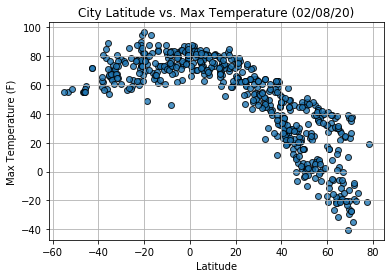

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\kehoc\Documents\DataViz\Homework\API-Challenge\WeatherPy\output_data_Fig1.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

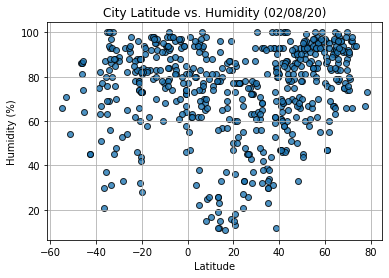

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\kehoc\Documents\DataViz\Homework\API-Challenge\WeatherPy\output_data_Fig2.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

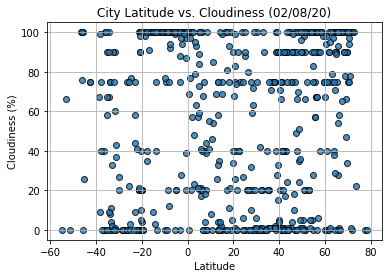

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloud,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r'C:\Users\kehoc\Documents\DataViz\Homework\API-Challenge\WeatherPy\output_data_Fig3.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

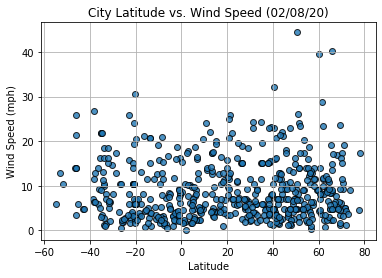

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_spd,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(r'C:\Users\kehoc\Documents\DataViz\Homework\API-Challenge\WeatherPy\output_data_Fig4.png')

# Show plot
plt.show()

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regress(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
south_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.857576355937044


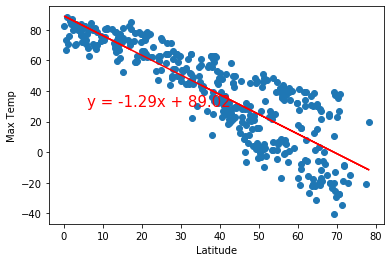

In [24]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
plot_linear_regress(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49350066559467226


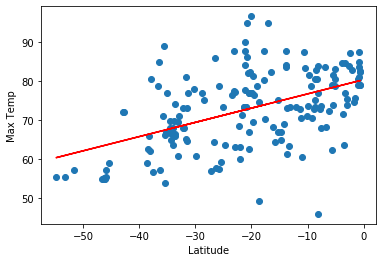

In [28]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
plot_linear_regress(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3612987848384983


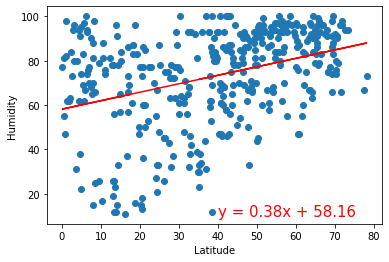

In [29]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
plot_linear_regress(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2254192626464822


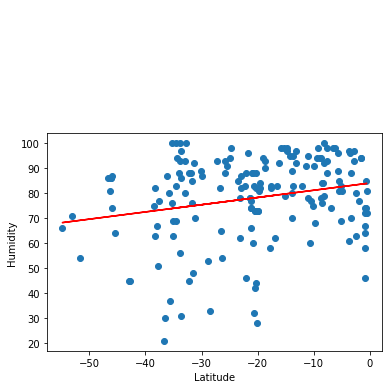

In [36]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
plot_linear_regress(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2084343963695866


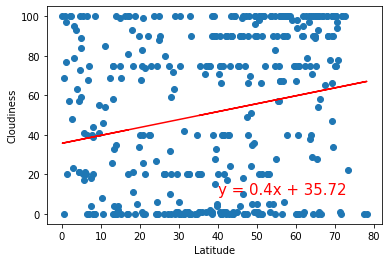

In [31]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
plot_linear_regress(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3236042161068538


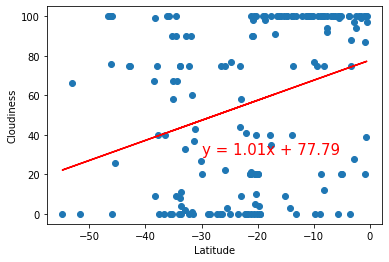

In [35]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
plot_linear_regress(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03809856521534111


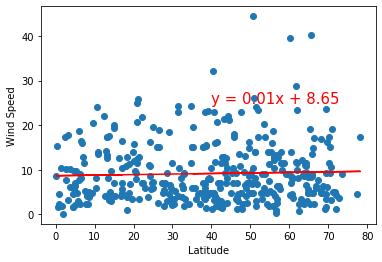

In [33]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
plot_linear_regress(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21983192050748687


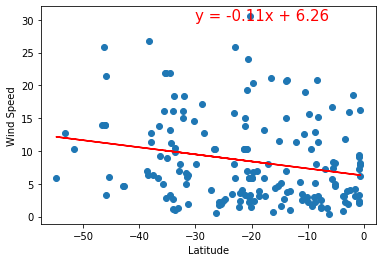

In [34]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
plot_linear_regress(x_values, y_values, 'Wind Speed', (-30,30))